# Example 3: Markov Stability applied to directed graph

In [1]:
import networkx as nx

from pygenstability import run, plotting, constructors

In [2]:
# creating directed partitioned graph

nx_graph = nx.planted_partition_graph(4, 20, 0.3, 0.01, seed=42, directed=True)
adjacency = nx.to_scipy_sparse_array(nx_graph)

In [3]:
# defining the constructor externally

directed_constructor = constructors.load_constructor('directed', adjacency, alpha=0.85)

In [4]:
# scan markov scale for communities

all_results = run(adjacency, min_scale=-1, max_scale = 1, constructor=directed_constructor)

Your graph is directed!
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 261.12it/s]


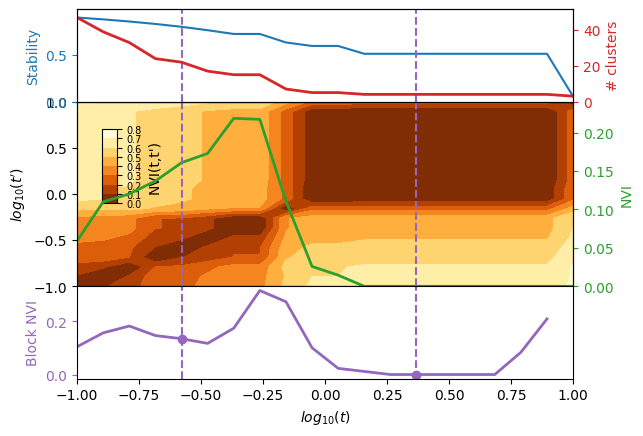

In [6]:
_ = plotting.plot_scan(all_results)

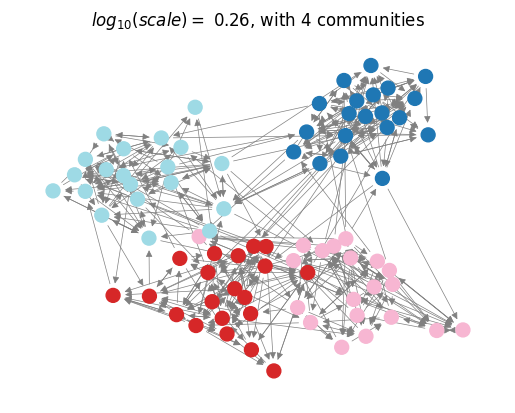

In [7]:
pos = nx.spring_layout(nx_graph, weight=None, scale=1)
for u in nx_graph:
    nx_graph.nodes[u]["pos"] = pos[u]

plotting.plot_single_partition(nx_graph, all_results, 12)
